In [8]:
import pandas as pd
import glob

In [11]:
carpeta="data/training_textos_hipotesis_salida/"

# Procesamiento de datos

In [12]:
resultados=pd.read_csv(carpeta+"resultados.csv")
resultados

,Unnamed: 0,0,1
0,0,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8257606029510498, 0.5979477763175964]"
1,1,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8346723318099976, 0.5942164063453674]"
2,2,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8352782726287842, 0.5890858173370361]"
3,3,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8114523887634277, 0.5965484976768494]"
4,4,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.9103481769561768, 0.5848880410194397]"
...,...,...,...
116,116,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.8718328475952148, 0.583566427230835]"
117,117,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.847361445426941, 0.594755232334137]"
118,118,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.8696404695510864, 0.5916084051132202]"
119,119,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.834011197090149, 0.5972027778625488]"


In [13]:
resultados=resultados.assign(grupo=0.0)
resultados=resultados.assign(error=0.0)
resultados=resultados.assign(accuracy=0.0)

In [14]:
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8257606029510498, 0.5979477763175964]",0.0,0.0,0.0
1,1,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8346723318099976, 0.5942164063453674]",0.0,0.0,0.0
2,2,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8352782726287842, 0.5890858173370361]",0.0,0.0,0.0
3,3,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8114523887634277, 0.5965484976768494]",0.0,0.0,0.0
4,4,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.9103481769561768, 0.5848880410194397]",0.0,0.0,0.0
...,...,...,...,...,...,...
116,116,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.8718328475952148, 0.583566427230835]",0.0,0.0,0.0
117,117,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.847361445426941, 0.594755232334137]",0.0,0.0,0.0
118,118,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.8696404695510864, 0.5916084051132202]",0.0,0.0,0.0
119,119,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.834011197090149, 0.5972027778625488]",0.0,0.0,0.0


In [15]:
temp=resultados.copy()
for index,strings in temp.iterrows():
    resultados.at[index,'grupo']=float(strings[1].split('_')[4])*100
    resultados.at[index,'error']=float(strings[2].split(',')[0][1:])
    resultados.at[index,'accuracy']=float(strings[2].split(',')[1][:-1])
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8257606029510498, 0.5979477763175964]",15.0,1.825761,0.597948
1,1,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8346723318099976, 0.5942164063453674]",15.0,1.834672,0.594216
2,2,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8352782726287842, 0.5890858173370361]",15.0,1.835278,0.589086
3,3,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.8114523887634277, 0.5965484976768494]",15.0,1.811452,0.596548
4,4,data/training_textos_hipotesis/0.15/TEST_new_0...,"[1.9103481769561768, 0.5848880410194397]",15.0,1.910348,0.584888
...,...,...,...,...,...,...
116,116,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.8718328475952148, 0.583566427230835]",20.0,1.871833,0.583566
117,117,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.847361445426941, 0.594755232334137]",20.0,1.847361,0.594755
118,118,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.8696404695510864, 0.5916084051132202]",20.0,1.869640,0.591608
119,119,data/training_textos_hipotesis/0.2/TEST_new_0....,"[1.834011197090149, 0.5972027778625488]",20.0,1.834011,0.597203


array([<AxesSubplot:title={'center':'error'}, xlabel='grupo'>,
       <AxesSubplot:title={'center':'accuracy'}, xlabel='grupo'>],
      dtype=object)

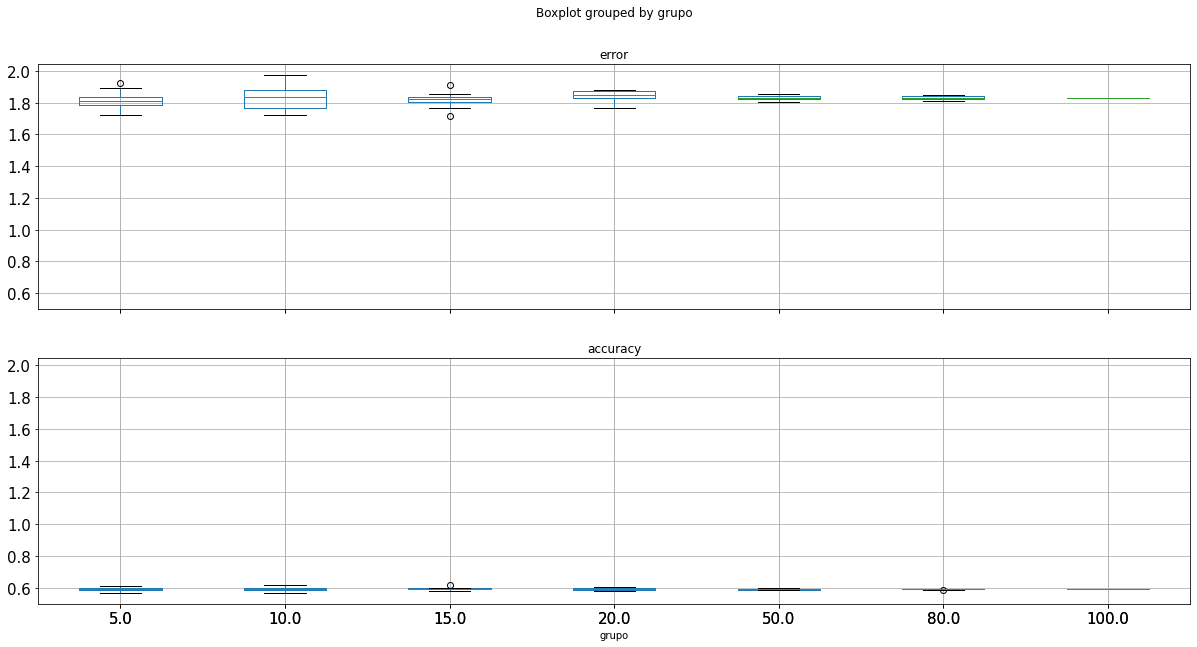

In [16]:
resultados.boxplot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=15,figsize=(20,10))
#resultados.boxplot(by='grupo')

<Figure size 720x432 with 0 Axes>

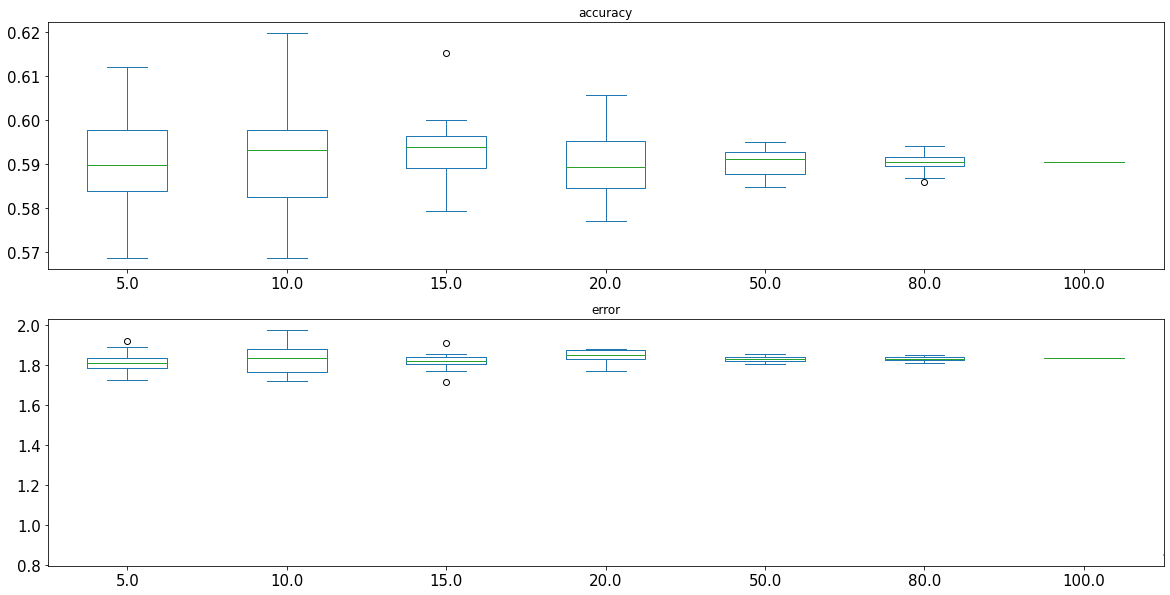

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
resultados.plot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=15,figsize=(20,10),subplots=True, 
    sharey=False,kind='box')
plt.axhline(y=0.85073, xmin=1, xmax=100)
plt.subplots_adjust(wspace=0.5)
plt.show()

# Del corpus base vamos a quitar los del test y solo comparar con los de paráfraseo

In [18]:
a=glob.glob(carpeta+'*.pickle')
a[0]

'data/training_textos_hipotesis_salida/pTEST_new_0.2_9.csv.pickle'

In [19]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

# Procesar todos los archivos para obtener las etiquetas originales y las predicciones

In [21]:
# Procesar los archivos obtenidos para procesarlos y tener un nuevo archivo de las etiquetas originales vs etiquetas de predicción
for e in a:
    df_prediction=pd.read_pickle(e)
    temp=df_prediction.copy()
    df_prediction.assign(predicted_label="")
    df_prediction.assign(gold_label="")
    for index,strings in temp.iterrows():
        p_e=mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        g_e=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])
        df_prediction.at[index,'predicted_label']=p_e
        df_prediction.at[index,'gold_label']=g_e
    df_prediction.to_pickle(e)

# Ya se tiene para todos los muestreos las etiquetas originales vs las predichas

In [23]:
new_data = {'Docs' : [], 'Total' : [], 'Total Entailment' : [], 'Total Entailment (E)' : [],
             'Total Entailment (N)' : [], 'Total Entailment (C)' : [], 'Total Neutral' : [],
             'Total Neutral (N)' : [], 'Total Neutral (E)' : [], 'Total Neutral (C)' : [],
             'Total Contradiction' : [],'Total Contradiction (C)' : [],'Total Contradiction (E)' : [],
             'Total Contradiction (N)' : [], 'grupo': [], 'parafraseo': []}
for e in a:
    df_predictionP=pd.read_pickle(e)
    for p in [0,1]:
        df_prediction=df_predictionP[df_predictionP["Paraphrase"]==p]
        c_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='entailment')].shape[0]
        cn_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='neutral')].shape[0]
        cc_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='contradiction')].shape[0]
        t_entailment=df_prediction[df_prediction['gold_label']=='entailment'].shape[0]
        c_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='neutral')].shape[0]
        ce_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='entailment')].shape[0]
        cc_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='contradiction')].shape[0]
        t_neutral=df_prediction[df_prediction['gold_label']=='neutral'].shape[0]
        c_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='contradiction')].shape[0]
        ce_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='entailment')].shape[0]
        cn_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='neutral')].shape[0]
        t_contradiction=df_prediction[df_prediction['gold_label']=='contradiction'].shape[0]
        new_data['Docs'].append(e)
        new_data['Total'].append(df_prediction.shape[0])
        new_data['Total Entailment'].append(t_entailment)
        new_data['Total Entailment (E)'].append(c_entailment)
        new_data['Total Entailment (N)'].append(cn_entailment)
        new_data['Total Entailment (C)'].append(cc_entailment)
        new_data['Total Neutral'].append(t_neutral)
        new_data['Total Neutral (E)'].append(ce_neutral)
        new_data['Total Neutral (N)'].append(c_neutral)
        new_data['Total Neutral (C)'].append(cc_neutral)
        new_data['Total Contradiction'].append(t_contradiction)
        new_data['Total Contradiction (E)'].append(ce_contradiction)
        new_data['Total Contradiction (N)'].append(cn_contradiction)
        new_data['Total Contradiction (C)'].append(c_contradiction)
        new_data['grupo'].append(float(e.split('_')[5])*100)
        new_data['parafraseo'].append(p)
new_data=pd.DataFrame(new_data)
new_data.to_csv(carpeta+"predictions/Fresultados.csv")

array([[<AxesSubplot:title={'center':'Total'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Entailment'}, xlabel='[grupo, parafraseo]'>],
       [<AxesSubplot:title={'center':'Total Neutral'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Contradiction'}, xlabel='[grupo, parafraseo]'>]],
      dtype=object)

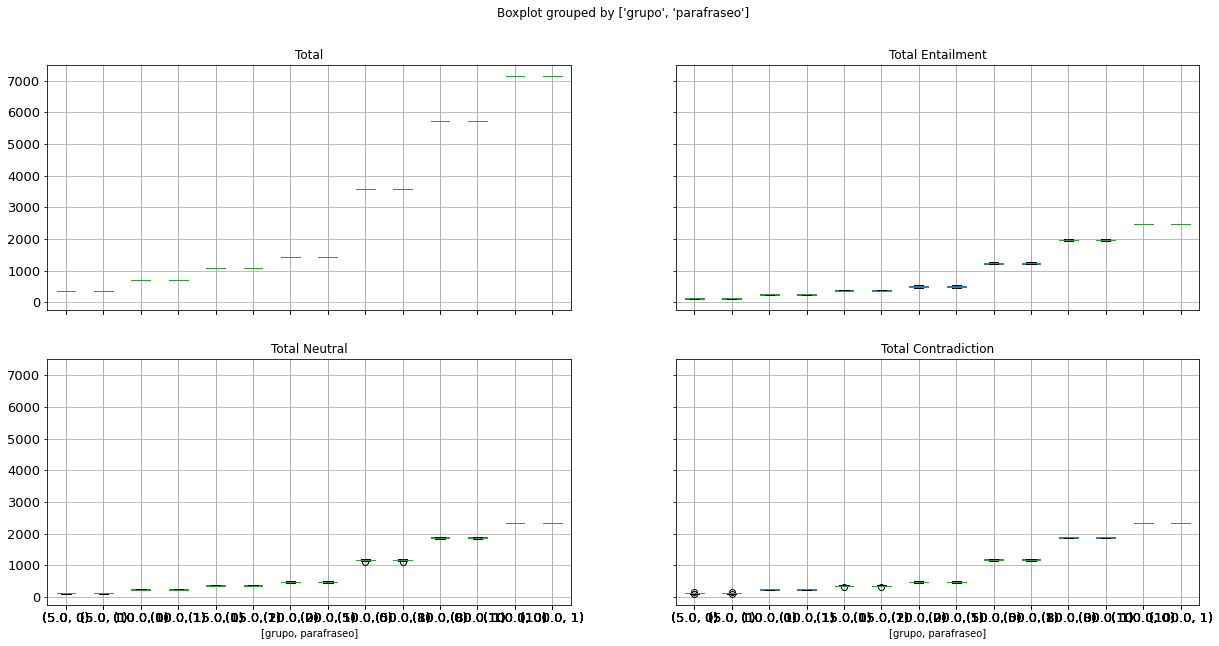

In [24]:
new_data.boxplot(column=['Total', 'Total Entailment','Total Neutral','Total Contradiction'],by=['grupo', 'parafraseo'],fontsize=13,figsize=(20,10))

#new_data.boxplot()

array([[<AxesSubplot:title={'center':'Total Entailment'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (E)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Entailment (N)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (C)'}, xlabel='grupo'>]],
      dtype=object)

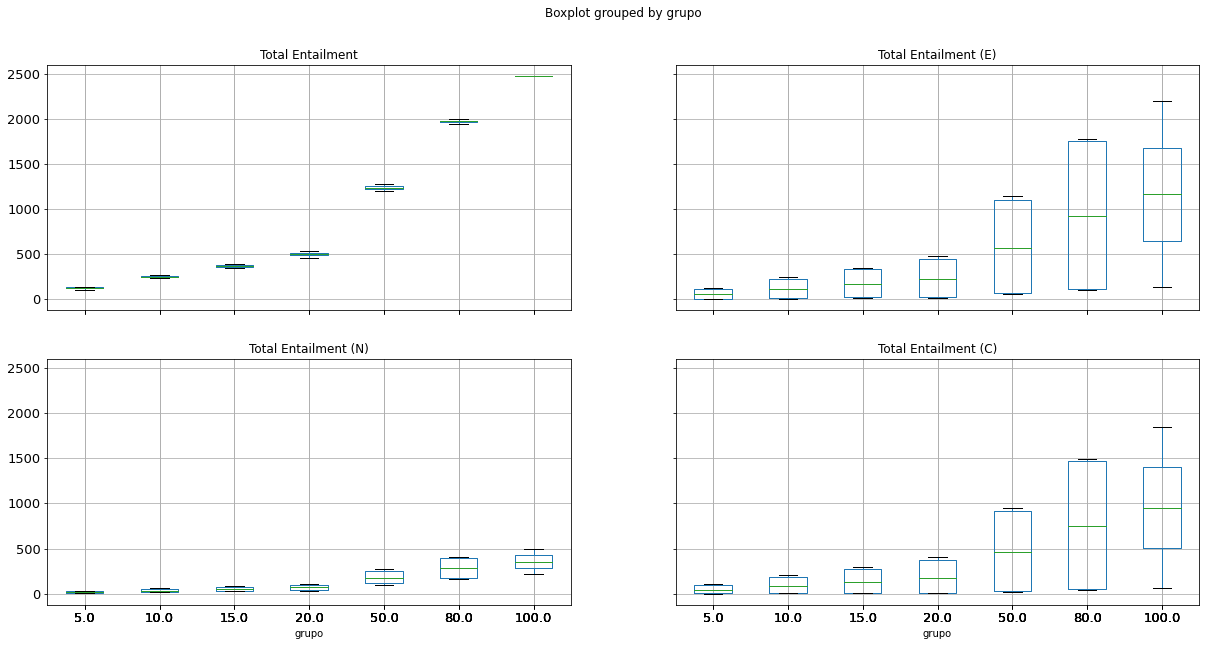

In [25]:
new_data.boxplot(column=['Total Entailment','Total Entailment (E)','Total Entailment (N)','Total Entailment (C)',],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Neutral'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (N)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Neutral (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (C)'}, xlabel='grupo'>]],
      dtype=object)

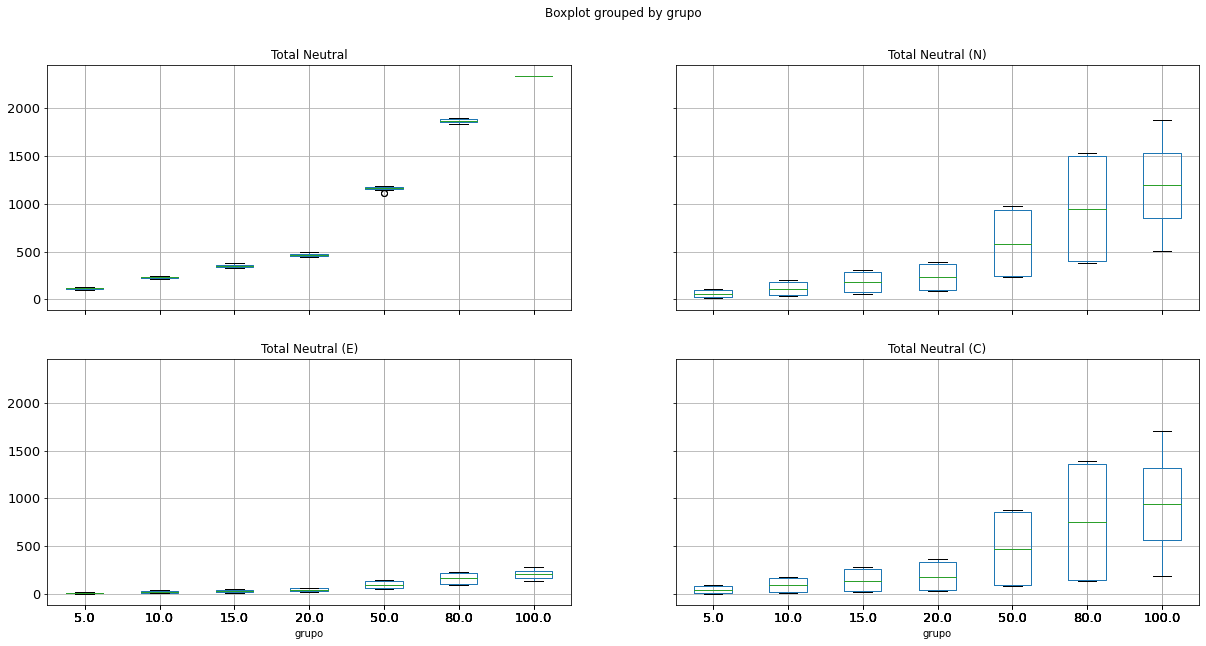

In [26]:
new_data.boxplot(column=['Total Neutral','Total Neutral (N)','Total Neutral (E)','Total Neutral (C)',],by='grupo',fontsize=13,figsize=(20,10))

<AxesSubplot:title={'center':'Total Contradiction'}, xlabel='grupo'>

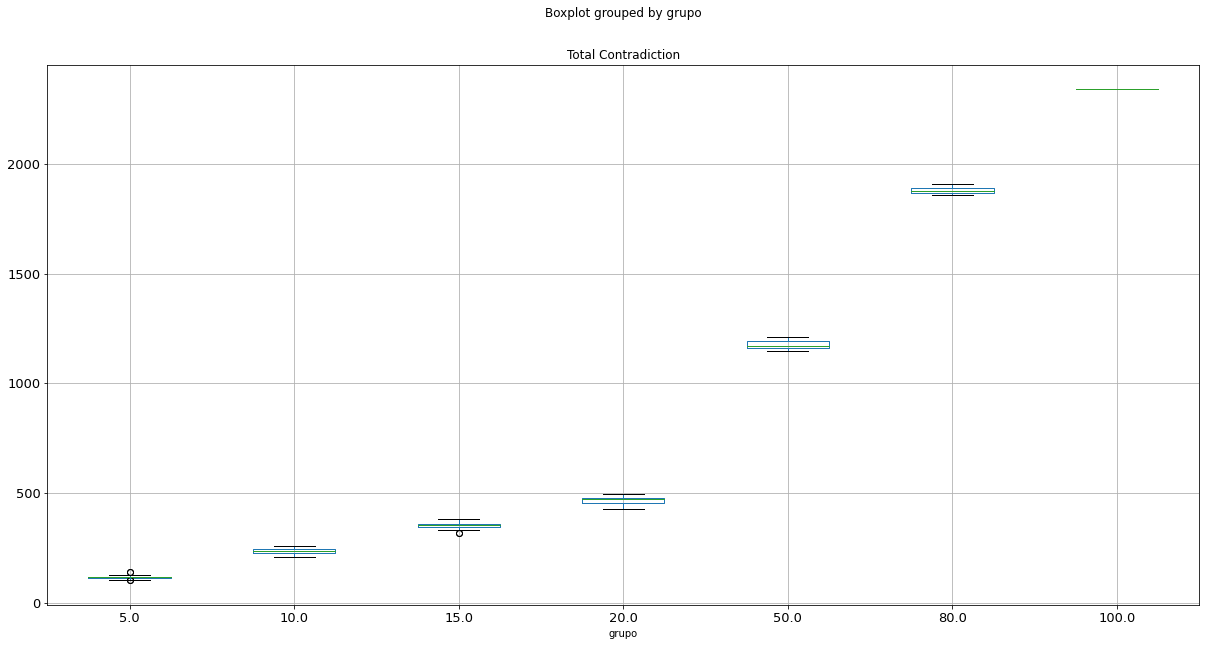

In [27]:
new_data.boxplot(column=['Total Contradiction'],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Contradiction'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (C)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Contradiction (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (N)'}, xlabel='grupo'>]],
      dtype=object)

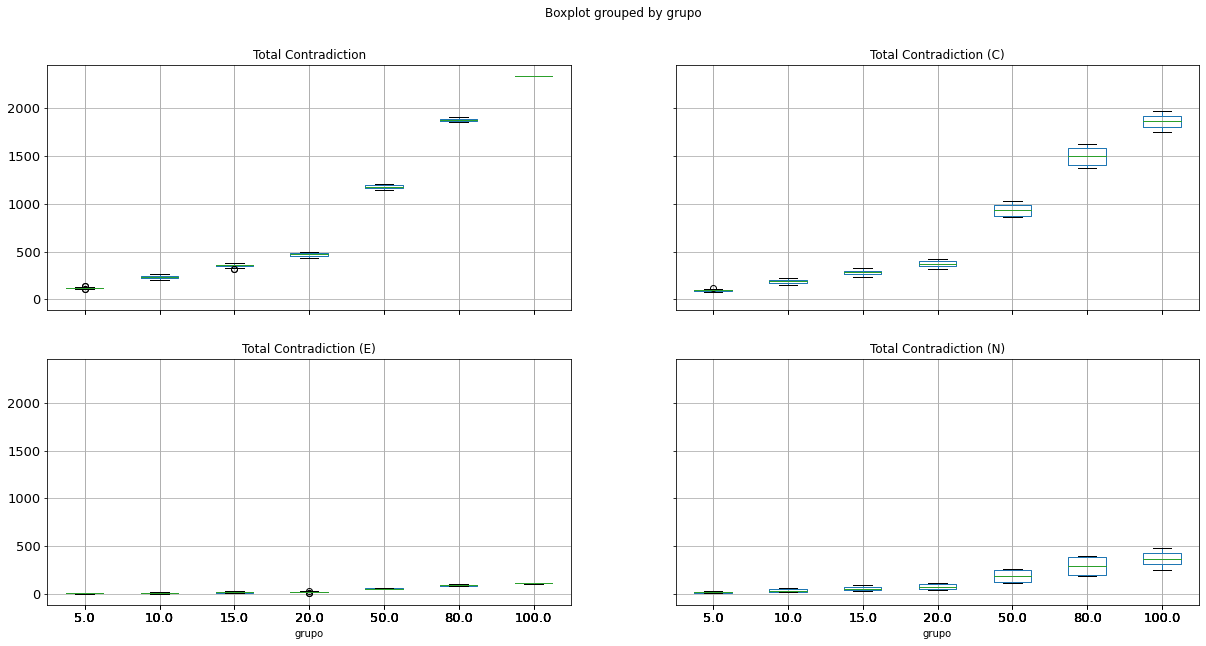

In [28]:
new_data.boxplot(column=['Total Contradiction','Total Contradiction (C)','Total Contradiction (E)','Total Contradiction (N)',],by='grupo',fontsize=13,figsize=(20,10))